In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/DL_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Victor Abiamiri,5,29,2.758621,NaN,NaN,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Career
1,Sam Acho,34,110,4.945455,Career,NaN,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Gaines Adams,18,47,6.127660,NaN,NaN,37.0,NaN,0.0,0.0,...,1.0,0.0,NaN,NaN,NaN,85.0,0.0,NaN,NaN,Career
3,Mike Adams,12,53,3.622642,Career,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Mario Addison,31,126,3.936508,Career,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['assists_on_tackles', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'other_touchdowns', 'passes_defended', 'plays_from_scrimmage', 'points', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.14603994055485026
Weights:  [ 6.98415969e-03 -2.86378727e-02 -4.02256516e-01 -3.84359876e-01
  3.47097630e-01 -1.52453200e+00 -3.46944695e-16  1.11308654e-01
 -3.54538831e-02 -2.21032869e-01 -1.32155351e-02  9.40065765e-01
 -1.39350159e-02  4.11377912e-02 -6.95085619e-03  1.74045073e+00
  3.80458893e-02  5.29780743e-02 -5.06405477e-02]


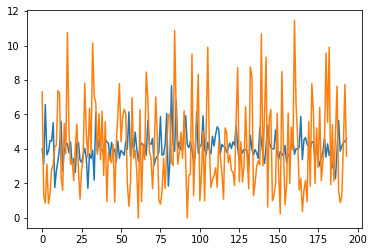

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['other_touchdowns', 'safeties', 'yards_returned_from_interceptions']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.0302598905536946
Weights:  [0.         1.63741671 0.01359951]


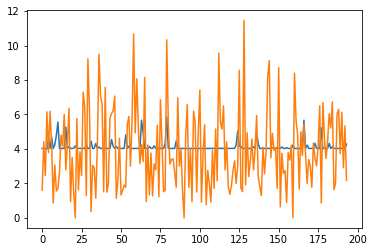

In [13]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.027996799927135108
Weights:  [0.         1.4016494  0.01355407]


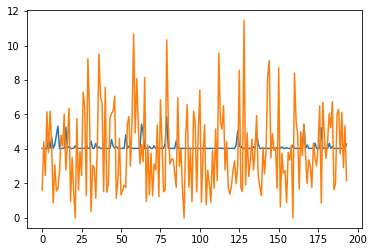

In [14]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [15]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.013589429805235293
[0.         0.73014554 0.00889503]

Ridge Regression
-0.013201463228153531
[0.         0.63798648 0.00885546]
